<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [17]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

##### Import Necessary Modules:


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [36]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df['Employment'].head(20)


0                                   Employed, full-time
1                                   Employed, full-time
2                                   Employed, full-time
3                                    Student, full-time
4                                    Student, full-time
5                                    Student, full-time
6                                   Employed, full-time
7     Student, full-time;Not employed, but looking f...
8                                   Employed, full-time
9     Independent contractor, freelancer, or self-em...
10                                  Employed, full-time
11                                  Employed, full-time
12                                  Employed, full-time
13               Not employed, and not looking for work
14                                  Employed, full-time
15                                  Employed, full-time
16                                   Student, full-time
17    Independent contractor, freelancer, or sel

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [20]:
## Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [21]:
## Write your code here
missing_values = df.isna().sum()
print('Total values missing in a dataframe per column: ')
print(missing_values)

Total values missing in a dataframe per column: 
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



/tmp/ipykernel_933/175476336.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  binned_missing_df = df.groupby('bin').apply(lambda x: x.isna().sum())


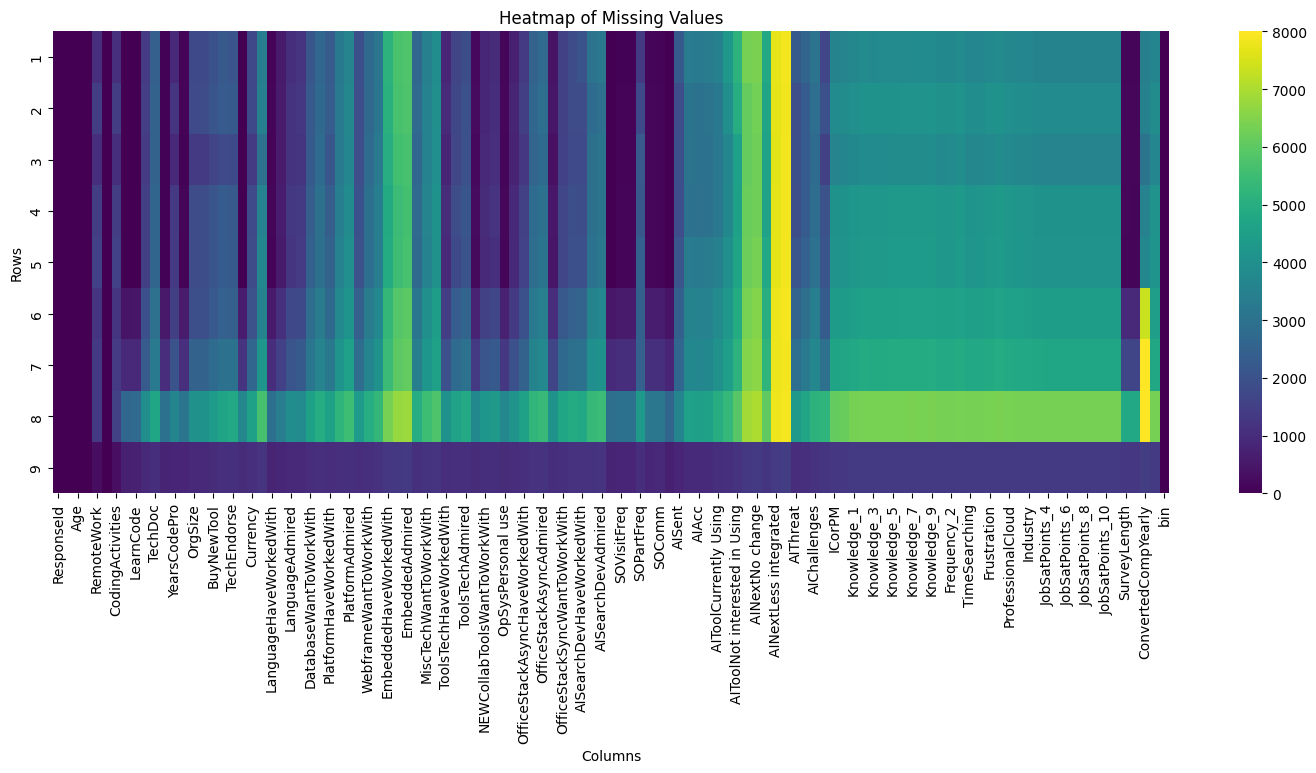

In [28]:
## Write your code here

# Define number of rows per bin 
bin_size = 8000

# Create a 'bin' column to assign each row to a bin
df['bin'] = (np.arange(len(df))// bin_size + 1)

# Group by 'bin' and sum missing values per column
binned_missing_df = df.groupby('bin').apply(lambda x: x.isna().sum())

plt.figure(figsize= (18,6))
sns.heatmap(binned_missing_df, cmap="viridis")
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [33]:
## Write your code here
missing_employment_values = df['Employment'].isna().sum()
print('Missing employment values: ')
print(missing_employment_values)

Missing employment values: 
0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [38]:
## Write your code here
most_frequent_employment = df['Employment'].mode()[0]

print('Most frequent value in Employment column:')
print(most_frequent_employment)

Most frequent value in Employment column:
Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [39]:
## Write your code here
df['Employment'] = df['Employment'].fillna(most_frequent_employment)
print('Missing values in Employment after imputation:')
print(df['Employment'].isna().sum())

Missing values in Employment after imputation:
0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


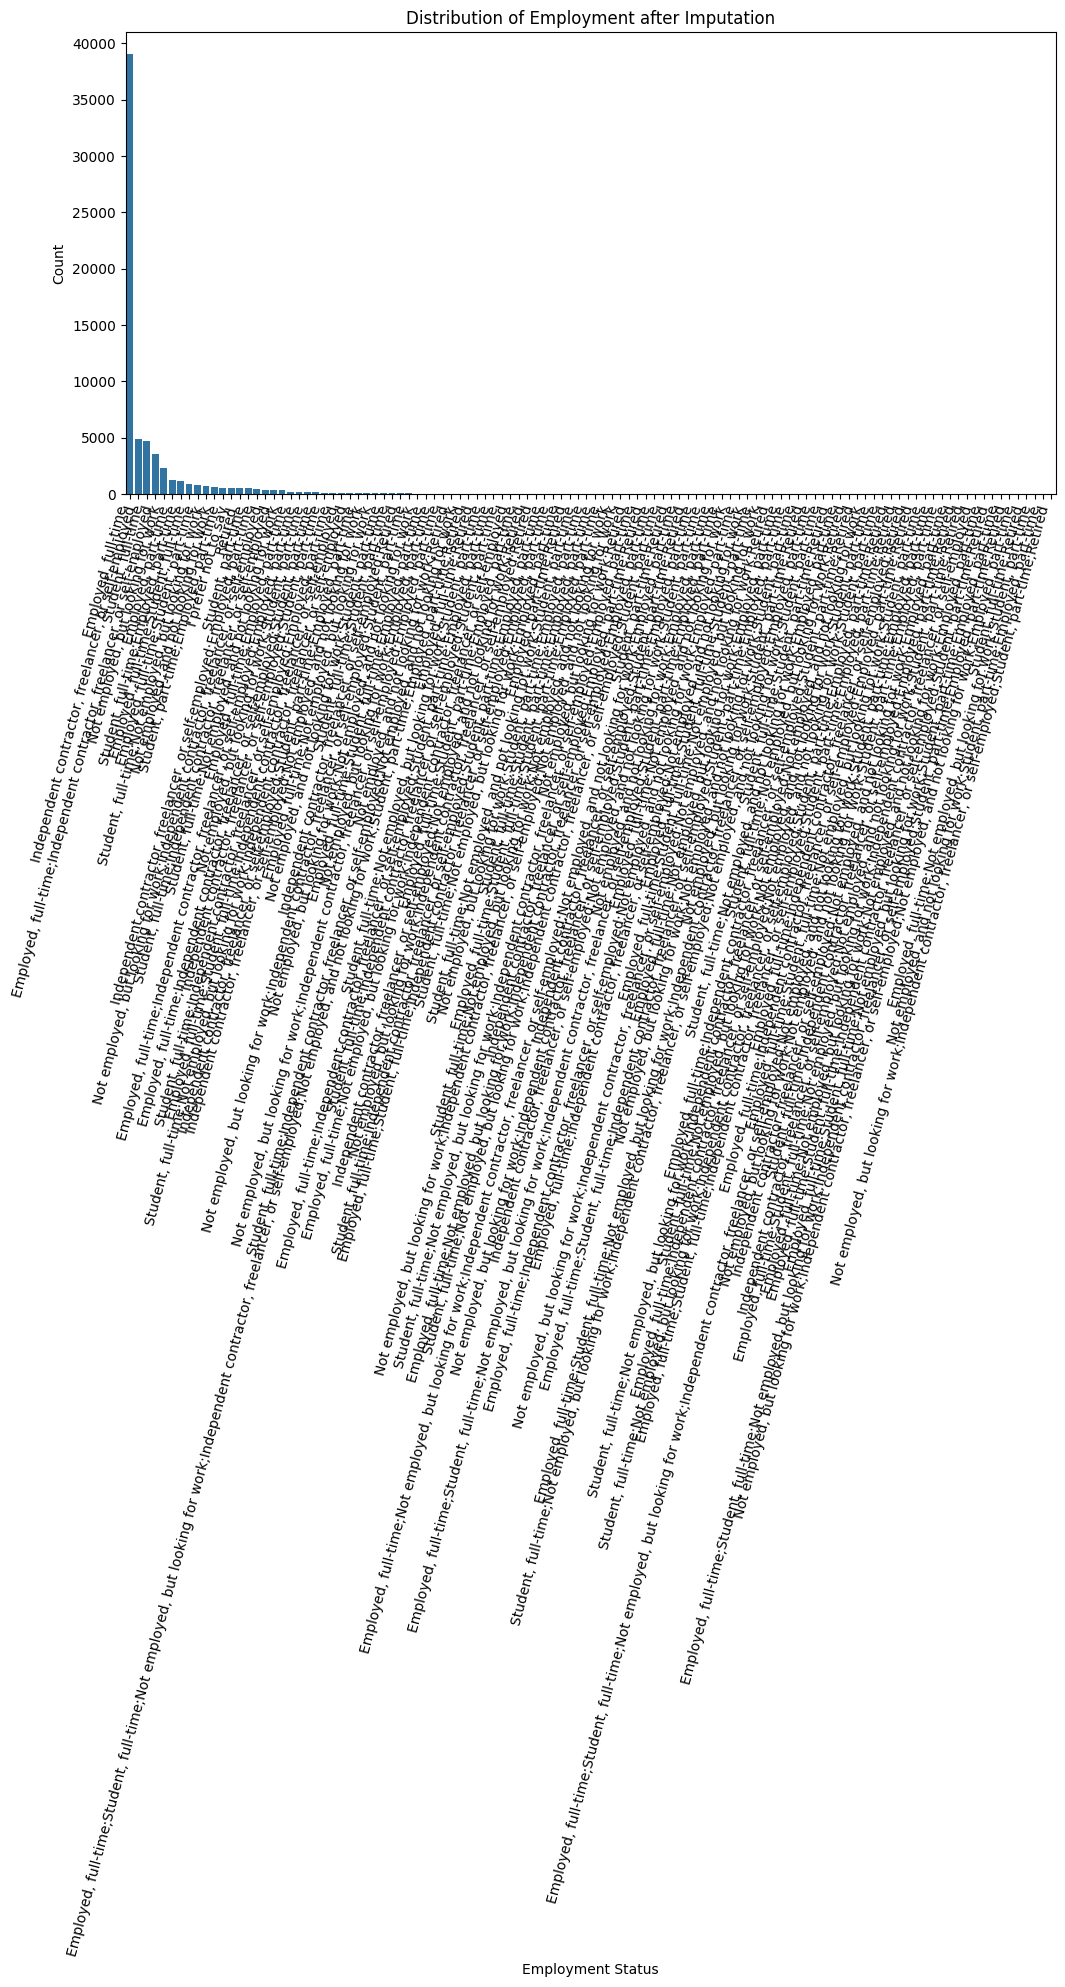

In [40]:
## Write your code here
plt.figure(figsize=(12,6))
sns.countplot(x = 'Employment', data = df, order=df['Employment'].value_counts().index)
plt.xticks(rotation=75, ha='right')
plt.title('Distribution of Employment after Imputation')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
